In [ ]:
#This is the code to analyse CVD hBN on Au data - simple DF data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import nplab.datafile as df
import scipy.signal as sig
import scipy.constants as const
import peakutils
import numpy as np
import datetime
from peakutils.plot import plot as pplot
from parula import cm_data
from matplotlib.colors import LinearSegmentedColormap 
from matplotlib.collections import LineCollection
import os
import Alexsdatafuncs
import matplotlib.cm as cm
import time
from sklearn.preprocessing import normalize
import matplotlib.cm as cm
colours = cm.viridis(np.linspace(0.25,0.75,5)) 

ImportError: No module named nplab.datafile

In [2]:
parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
copper_map = LinearSegmentedColormap.from_list('copper', cm_data)
colours_1 = cm.viridis(np.linspace(0,1,500))
colours_2 = cm.hot(np.linspace(0,1,500))
Alex_data = Alexsdatafuncs.data_manipulators()
Alex_plot = Alexsdatafuncs.plotting_funcs()

In [84]:
data_f.close()

In [88]:
data_f = df.open_file(set_current = False)
fname = data_f.filename

Cancelled by the user.


AttributeError: 'NoneType' object has no attribute 'filename'

In [4]:
filelist = data_f['OceanOpticsSpectrometer']

In [5]:
ref = filelist.values()[0].attrs['reference']
bgd = filelist.values()[0].attrs['background']
wl = filelist.values()[0].attrs['wavelengths']

In [33]:
#Select data to deal with here
start_time_tot = datetime.datetime.strptime('2019-03-08T15:09:27.344000', 
                                        "%Y-%m-%dT%H:%M:%S.%f")
finish_time_tot = datetime.datetime.strptime('2019-03-08T17:15:37.743000', 
                                        "%Y-%m-%dT%H:%M:%S.%f")

In [34]:
#Create array to hold data with corresponding time value
all_data_w_time = []
all_data_w_time_n = []

#Iterate through data set and make array with data in one column and timestamp in the other
for data_set in filelist.values():
    
    t = datetime.datetime.strptime(
                        data_set.attrs['creation_timestamp'][:19], "%Y-%m-%dT%H:%M:%S")
    
    n = data_set.name[25:]
    
                     
    data = (data_set.value - bgd)/(ref - bgd)
    
    if t >= start_time_tot and t <= finish_time_tot: #Make sure you choose the right start and finish time

        s = (t-datetime.datetime(1970,1,1)).total_seconds()

        data_w_time = np.append(data, s)
        all_data_w_time.append(data_w_time)
    
#Sort all the data vs timestamp   
all_data_w_time_sorted = sorted(all_data_w_time,key=lambda x: x[-1])
all_data = np.delete(all_data_w_time_sorted, -1,1) #Delete the timestamp column of data

#Filter the data to help define peaks
all_data_filtered = []
for i in range(0, len(all_data)):
    filt_data = sig.savgol_filter(all_data[i],23,1)
    all_data_filtered.append(filt_data)
    


In [35]:
all_data_norm = []
for i in range(0, len(all_data)):
    inf_norm = np.linalg.norm(all_data_filtered[i][30:910], axis=0, ord = np.inf)
    all_data_norm.append(all_data_filtered[i]/inf_norm)

In [36]:
On_hBN_80nm = all_data[0:254]
Off_hBN_80nm = all_data[254:len(all_data)]

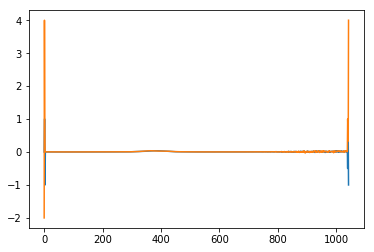

In [37]:
plt.plot(all_data[0])
plt.plot(all_data[1])

In [69]:
On_hBN_80nm_av = np.mean(On_hBN_80nm, axis = 0)
On_hBN_80nm_std = np.std(On_hBN_80nm, axis = 0)/5#/(np.sqrt(len(On_hBN_80nm_av)))
On_hBN_80nm_av_sm = sig.savgol_filter(On_hBN_80nm_av, 23, 3)
On_hBN_80nm_std_sm = sig.savgol_filter(On_hBN_80nm_std, 23, 3)

Off_hBN_80nm_av = np.mean(Off_hBN_80nm, axis = 0)
Off_hBN_80nm_std = np.std(Off_hBN_80nm, axis = 0)/5#/np.sqrt(len(Off_hBN_80nm_av))
Off_hBN_80nm_av_sm = sig.savgol_filter(Off_hBN_80nm_av, 23, 3)
Off_hBN_80nm_std_sm = sig.savgol_filter(Off_hBN_80nm_std, 23, 3)

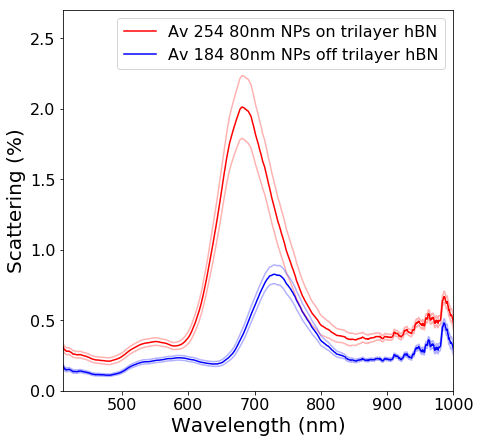

In [87]:
fig = plt.figure(1, figsize = (7,7))
ax = fig.add_subplot(111)
ax.plot(wl, On_hBN_80nm_av_sm*100, color = "r", label = "Av 254 80nm NPs on trilayer hBN")
ax.plot(wl, Off_hBN_80nm_av_sm*100, color = "b", label = "Av 184 80nm NPs off trilayer hBN")
ax.plot(wl, (On_hBN_80nm_av_sm + On_hBN_80nm_std_sm)*100, color = "r", alpha = 0.3)
ax.plot(wl, (On_hBN_80nm_av_sm - On_hBN_80nm_std_sm)*100, color = "r", alpha = 0.3)
ax.plot(wl, (Off_hBN_80nm_av_sm + Off_hBN_80nm_std_sm)*100, color = "b", alpha = 0.3)
ax.plot(wl, (Off_hBN_80nm_av_sm - Off_hBN_80nm_std_sm)*100, color = "b", alpha = 0.3)
ax.set_xlim(410, 1000)
ax.set_ylim(0, 2.7)
ax.set_xlabel("Wavelength (nm)", fontsize = 20)
ax.set_ylabel("Scattering (%)", fontsize = 20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.legend(fontsize = 16)

fig.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/Boron Nitride spacer/Trilayer hBN/80nm on off hBN av 151118_tri3.png', bbox_inches='tight')


In [ ]:
#Find peaks in data for smoothed data
thresh_guess = 0.5
lw_guess = 40
peak_wls_norm = []
peak_ints_norm = []

for i in range(0, len(norm_data)):
    peak_indexes = peakutils.indexes(On_[i],thres = thresh_guess, min_dist = lw_guess*2)
    peak_wls_norm.append(wl[peak_indexes])
    peak_ints_norm.append(norm_data[i][peak_indexes])  

peak_wls_norm = np.array(peak_wls_norm)
peak_ints_norm = np.array(peak_ints_norm)

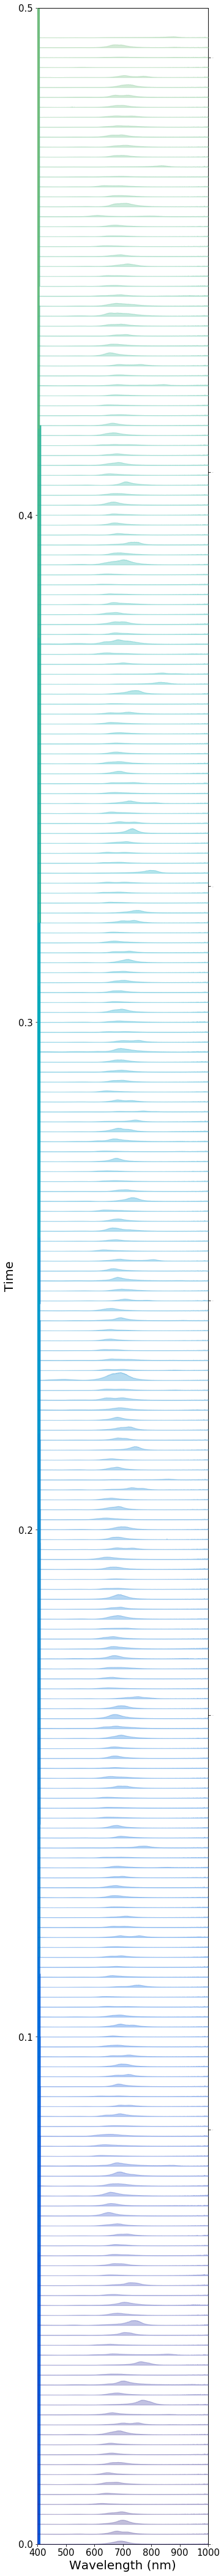

In [83]:
#Plot the raw data
#This factor defines the offset between each spectrum in the graph
mega_fact = 0.12
#This calls the function which adds the offset
all_data_norm_os = Alex_plot.offset_spectra(On_hBN_80nm, mega_fact)

fig1 = plt.figure(1, figsize = (5,0.3*len(all_data_norm_os)))
ax1 = fig1.add_subplot(111)
ax1b = ax1.twinx()

colours = parula_map(np.linspace(0,0.6,len(all_data_norm_os)))
for i in range(0, len(all_data_norm_os)-1):
    lwidths = (all_data_norm_os[i] - i*mega_fact)*2
    points = np.array([wl , all_data_norm_os[i]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis = 1)
    lc_2 = LineCollection(segments, linewidths = lwidths, color = colours[i])
    ax1b.add_collection(lc_2)
    spec1 = np.array(all_data_norm_os[i], dtype = float)
#     spec2 = np.array(len(all_data_w_time_sorted_offset_n[i])*[i], dtype = float)
    spec2 = np.ones(len(wl))*i*mega_fact
    ax1b.fill_between(wl, spec1, spec2, color = colours[i], 
                alpha = 0.3, zorder = 3)
    #Add in scatter spectra with peak wavelengths
    #ax1b.scatter(peak_wls_norm_1[i], peak_ints_norm_1[i] + i*mega_fact, color = "black", marker = "+" )

    
#ax1.axhline(1, 405, 1000, color = 'r', linewidth = 10)
ax1.set_xlim(400, 1000)
ax1.set_xlabel("Wavelength (nm)", fontsize = 20)
ax1.set_ylabel("Time", fontsize = 20)
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.set_ylim(0,0.5)
ax1b.set_ylim(0, (i+3)*mega_fact)
ax1b.tick_params(axis='y', labelsize=0)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/060319 Experiment/100nm NP6 2mW vs time PL.png', bbox_inches='tight')
